In [8]:
import numpy as np

import pandas as pd

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge, LassoCV


import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
hp = pd.read_csv('house_price.csv')
print(hp.head(10))
print(hp.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

In [10]:
#dropping the columns containing a lot of null values
hp=hp.drop(['Alley', 'LotFrontage', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis =1)

C:\Users\nipin\AppData\Local\Temp\ipykernel_972\851792988.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hp.corr(),annot=True, cmap="RdBu_r", center =0);


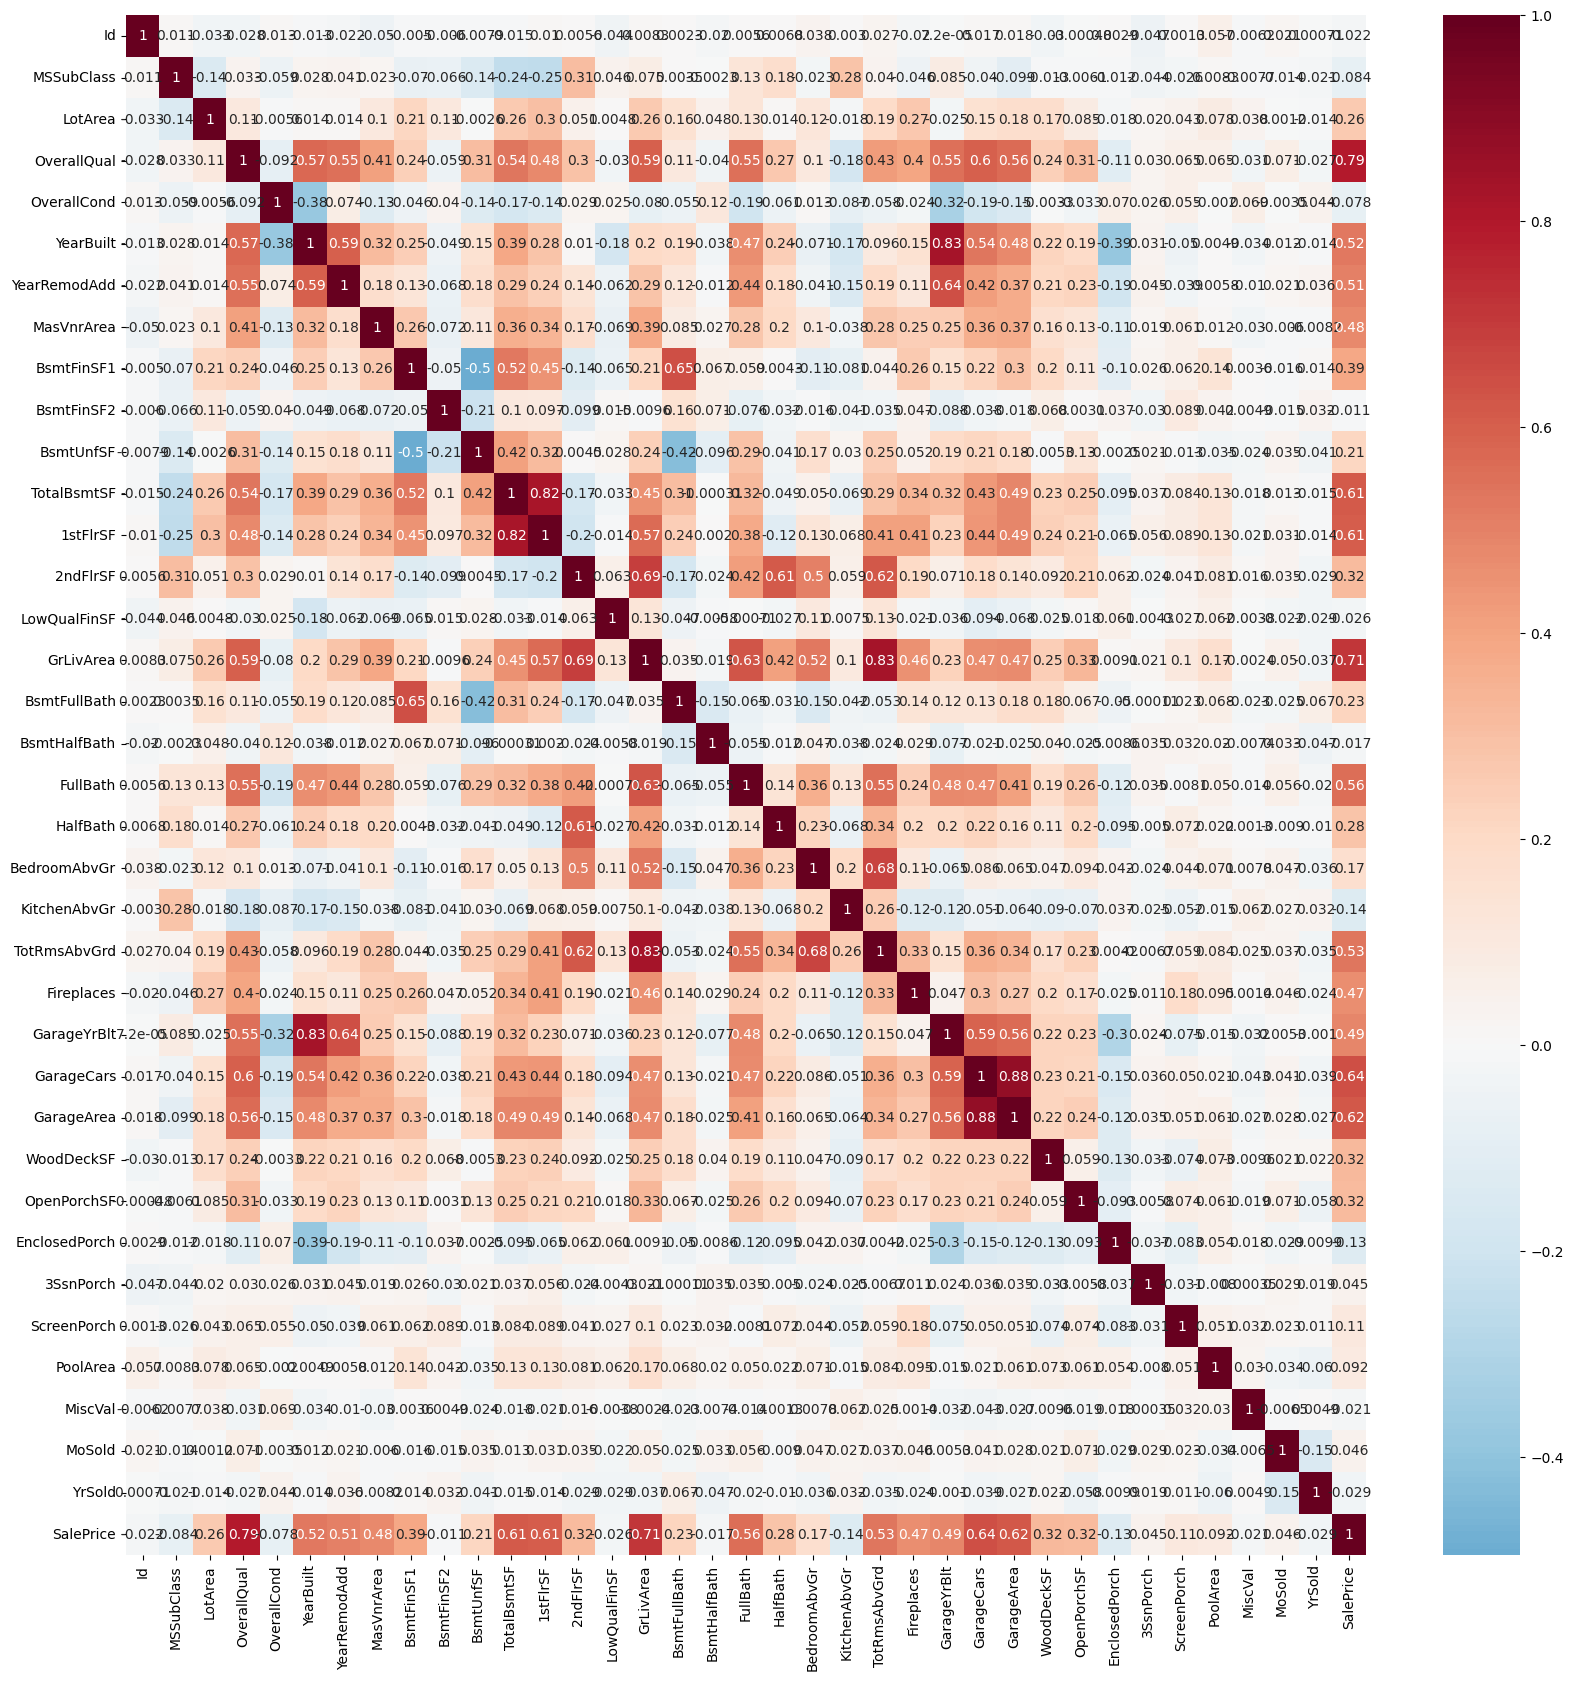

In [11]:
# to check the correlation of numerical variables we plot heatmap (it itself takes only nuneric variables)
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(hp.corr(),annot=True, cmap="RdBu_r", center =0);

In [12]:
#removing the columns that are least correlated and irrelevant.
hp=hp.drop(['Id', 'MSSubClass', 'LotArea', 'OverallCond','YearBuilt', 'YearRemodAdd','MasVnrArea', 'BsmtFinSF2', 
            'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath',
            'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces','GarageYrBlt','WoodDeckSF','OpenPorchSF', 
            'EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'], axis =1)

In [14]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  OverallQual    1460 non-null   int64 
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [15]:
# Separating the numerical and categorical variables
cat_cols = hp.select_dtypes(include=['object']).columns.tolist()
num_cols = hp.select_dtypes(exclude=['object']).columns.tolist()


In [16]:
hp[num_cols]=hp[num_cols].fillna(hp[num_cols].mean())        

In [17]:
hp[cat_cols] = hp[cat_cols].fillna(hp[cat_cols].mode().iloc[0])
hp.isnull().sum(axis=0)

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [18]:
scaler = preprocessing.StandardScaler()

hp[num_cols] = pd.DataFrame(scaler.fit_transform(hp[num_cols]))
hp


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,0.311725,0.351000,TA,TA,Y,WD,Normal,0.347273
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,0.311725,-0.060731,TA,TA,Y,WD,Normal,0.007288
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,0.311725,0.631726,TA,TA,Y,WD,Normal,0.536154
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,1.650307,0.790804,TA,TA,Y,WD,Abnorml,-0.515281
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,1.650307,1.698485,TA,TA,Y,WD,Normal,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Attchd,RFn,0.311725,-0.060731,TA,TA,Y,WD,Normal,-0.074560
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Attchd,Unf,0.311725,0.126420,TA,TA,Y,WD,Normal,0.366161
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Attchd,RFn,-1.026858,-1.033914,TA,TA,Y,WD,Normal,1.077611
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Attchd,Unf,-1.026858,-1.090059,TA,TA,Y,WD,Normal,-0.488523


In [19]:
dummies=pd.get_dummies(hp[cat_cols])


In [20]:
hp_new = pd.concat([hp[num_cols],dummies], axis=1)

In [21]:
hp_new.columns


Index(['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea', 'SalePrice', 'MSZoning_C (all)',
       'MSZoning_FV',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=242)

In [24]:
hp_new.head()

,OverallQual,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice,MSZoning_C (all),MSZoning_FV,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.651479,0.575425,-0.459303,-0.793434,0.370333,0.311725,0.351000,0.347273,0,0,...,0,0,0,1,0,0,0,0,1,0
1,-0.071836,1.171992,0.466465,0.257140,-0.482512,0.311725,-0.060731,0.007288,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.651479,0.092907,-0.313369,-0.627826,0.515013,0.311725,0.631726,0.536154,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.651479,-0.499274,-0.687324,-0.521734,0.383659,1.650307,0.790804,-0.515281,0,0,...,0,0,0,1,1,0,0,0,0,0
4,1.374795,0.463568,0.199680,-0.045611,1.299326,1.650307,1.698485,0.869843,0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
target= hp_new['SalePrice']
target




0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
          ...   
1455   -0.074560
1456    0.366161
1457    1.077611
1458   -0.488523
1459   -0.420841
Name: SalePrice, Length: 1460, dtype: float64

In [26]:
feats = hp_new.drop('SalePrice', axis=1)
                
feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 241 entries, OverallQual to SaleCondition_Partial
dtypes: float64(7), uint8(234)
memory usage: 413.6 KB


In [27]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state= 101)

In [30]:
def rmse_cv(model):     
    score= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))     
    rmse=score.mean()
    return rmse

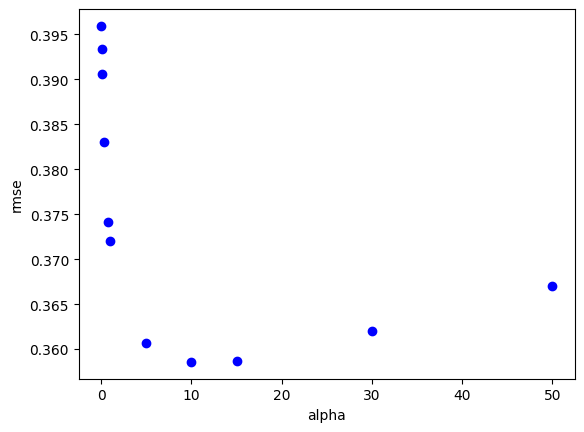

In [31]:
alphas =[0.01, 0.05, 0.1, 0.3, 0.8, 1, 5, 10, 15, 30, 50]
score=[]
for a in alphas:
    ridge_reg = Ridge(alpha = a)
    ridge_reg.fit(X_train, y_train)
    score=rmse_cv(ridge_reg)
    plt.plot(a, score, 'bo')
    plt.xlabel('alpha')
    plt.ylabel('rmse')
plt.show()

In [32]:
print('The best alpha from the graph is 10')

The best alpha from the graph is 10


In [44]:
ridge_best = Ridge(alpha = 10)
ridge_best.fit(X_train, y_train)
pred_test  = ridge_best.predict(X_test)
pred_train = ridge_best.predict(X_train)
print("score test :", ridge_best.score(X_test, y_test))

score test : 0.6982604998327802


In [45]:

from sklearn.linear_model import LassoCV

model_lasso = LassoCV(cv=10, alphas = (10, 1, 0.1, 0.1, 0.001, 0.0005)).fit(X_train, y_train)

lasso_pred_test = model_lasso.predict(X_test)
print('Test score:', model_lasso.score(X_test,y_test))



Test score: 0.7120951717400772


In [37]:
from sklearn.linear_model import lasso_path
my_alphas = [0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0]

alpha_path, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=my_alphas)

print(coefs_lasso.shape)
model_lasso.alpha_


(241, 10)


0.001

In [42]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso kept " + str(sum(coef != 0)) + " and eliminated the " +  str(sum(coef == 0)) + " other variables")

Lasso kept 104 and eliminated the 137 other variables


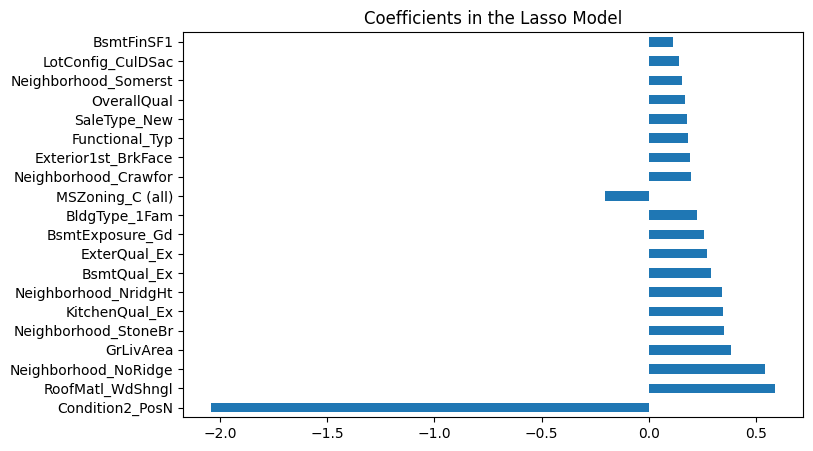

In [43]:
imp_coef = coef.sort_values(ascending = False, key = abs).head(20)

plt.figure(figsize= (8,5))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model");